In [1]:
import pandas

In [13]:
all_train = pandas.read_csv('../../data/sydtrains.csv', index_col=1, thousands=',')
columns = [c for c in all_train.columns if c.startswith('IN') or c.startswith('OUT')]
sydtrains = all_train[all_train.YEAR==2014][columns]
#
sydtrains

,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS
STATION,,,,,,,,,,,,
Central,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110
Town Hall,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620
Wynyard,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200
Parramatta,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960
North Sydney,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610
Redfern,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680
Chatswood,210,200,5030,8200,4710,4930,9430,6000,2820,2860,22200,22200
Bondi Junction,210,210,10150,4350,4370,4600,5240,8330,1910,4380,21880,21880
Strathfield,190,190,7900,4050,4980,3950,5540,7230,2100,5280,20710,20710


In [14]:
import sklearn.decomposition

In [16]:
pca = sklearn.decomposition.PCA(whiten=True)

In [17]:
pca.fit_transform(sydtrains)

array([[ 10.07366617,   0.04766171,  -8.12940766, ...,  -0.07447949,
          0.14089599,   0.15862721],
       [  9.33515155,   2.8748101 ,  -4.11662096, ...,  -0.13939472,
         -0.13784361,  -1.80984061],
       [  6.32956389,   6.58019465,  10.07302515, ...,   0.72527537,
          0.30129754,  -3.87534914],
       ..., 
       [ -0.37450115,   0.5598835 ,  -0.32341239, ...,  -0.03231668,
         -0.21890035,  -0.01452264],
       [ -0.37450115,   0.5598835 ,  -0.32341239, ...,  -0.03231668,
         -0.21890035,  -0.01452264],
       [ -0.37450115,   0.5598835 ,  -0.32341239, ...,  -0.03231668,
         -0.21890035,  -0.01452264]])

In [33]:
transformed_data = pca.fit_transform(sydtrains)
transformed_data.shape

(308, 12)

In [21]:
transformed_data[:,0].max()

10.07366616615653

In [22]:
transformed_data[:,0].min()

-0.37450115273995649

In [23]:
transformed_data[:,11].max()

15.270498516711219

In [24]:
transformed_data[:,11].min()

-3.875349135122478

In [25]:
%matplotlib inline
import matplotlib.pyplot

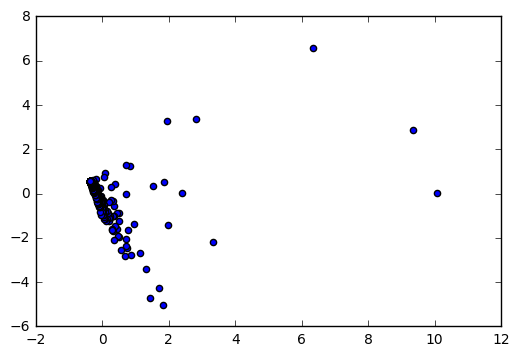

In [26]:
matplotlib.pyplot.scatter(transformed_data[:,0], transformed_data[:,1])

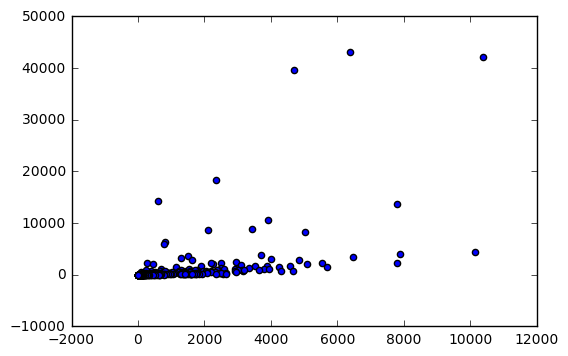

In [28]:
matplotlib.pyplot.scatter(sydtrains.IN_0600_0930, sydtrains.OUT_0600_0930)

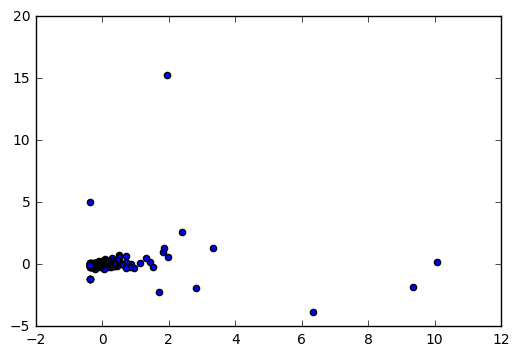

In [29]:
matplotlib.pyplot.scatter(transformed_data[:,0], transformed_data[:,11])

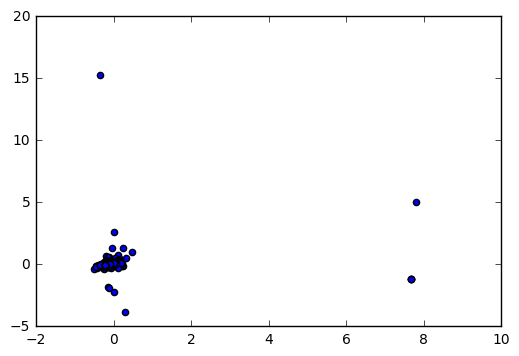

In [30]:
matplotlib.pyplot.scatter(transformed_data[:,10], transformed_data[:,11])

In [37]:
transformed_data[:,11] = 0
transformed_data[:,10] = 0
transformed_data[:,9] = 0

In [38]:
transformed_data[:,2:9] = 0

In [39]:
transformed_data

array([[ 10.07366617,   0.04766171,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  9.33515155,   2.8748101 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  6.32956389,   6.58019465,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ -0.37450115,   0.5598835 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -0.37450115,   0.5598835 ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -0.37450115,   0.5598835 ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [41]:
reborn_dataset = pca.inverse_transform(transformed_data)
reborn_dataset

array([[  9.85233428e+02,   9.28679672e+02,   1.24838171e+04, ...,
          8.50042582e+03,   9.70049794e+04,   9.70049794e+04],
       [  8.81658705e+02,   8.59718245e+02,   8.50469213e+03, ...,
          6.61243225e+03,   8.93687054e+04,   8.93687054e+04],
       [  5.57047789e+02,   5.88165949e+02,   9.91504629e+02, ...,
          2.51798210e+03,   6.04677702e+04,   6.04677702e+04],
       ..., 
       [  1.04759133e+01,  -8.66054552e-01,   1.30841396e+02, ...,
         -4.16852655e+01,  -9.96709823e+00,  -9.96709823e+00],
       [  1.04759133e+01,  -8.66054552e-01,   1.30841396e+02, ...,
         -4.16852655e+01,  -9.96709823e+00,  -9.96709823e+00],
       [  1.04759133e+01,  -8.66054552e-01,   1.30841396e+02, ...,
         -4.16852655e+01,  -9.96709823e+00,  -9.96709823e+00]])

In [43]:
reborn_dataset[0,]

array([   985.23342784,    928.67967242,  12483.81709517,  44748.81178788,
        19511.87144993,  25115.15639246,  45845.69189762,  17715.00604249,
        18178.809911  ,   8500.42581771,  97004.9793614 ,  97004.9793614 ])

In [45]:
sydtrains.loc['Central']

IN_0200_0600       940
OUT_0200_0600      920
IN_0600_0930     10390
OUT_0600_0930    42070
IN_0930_1500     21400
OUT_0930_1500    30150
IN_1500_1830     45370
OUT_1500_1830    16270
IN_1830_0200     19010
OUT_1830_0200     7700
IN_24_HOURS      97110
OUT_24_HOURS     97110
Name: Central, dtype: int64

In [46]:
reborn_dataset[-1,]

array([  10.47591333,   -0.86605455,  130.84139616,  124.30199481,
        -77.15096748, -126.65325374,   20.37070719,   35.26084264,
        -94.73993902,  -41.68526555,   -9.96709823,   -9.96709823])

In [47]:
sydtrains.loc['Zig Zag']

IN_0200_0600     0
OUT_0200_0600    0
IN_0600_0930     0
OUT_0600_0930    0
IN_0930_1500     0
OUT_0930_1500    0
IN_1500_1830     0
OUT_1500_1830    0
IN_1830_0200     0
OUT_1830_0200    0
IN_24_HOURS      0
OUT_24_HOURS     0
Name: Zig Zag, dtype: int64

In [48]:
transformed_data[0,]

array([ 10.07366617,   0.04766171,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [49]:
# That's roughly central, transformed

In [50]:
pca.components_

array([[  6.14822544e-03,   5.89778884e-03,   7.48085843e-02,
          2.86879669e-01,   1.23449983e-01,   1.60068707e-01,
          2.93558933e-01,   1.09467401e-01,   1.17068063e-01,
          5.27365625e-02,   6.15029764e-01,   6.15029764e-01],
       [ -5.94092451e-03,  -5.58149400e-04,  -5.32146534e-01,
          5.23969781e-01,  -1.35067625e-01,  -2.77605535e-02,
          3.85084261e-01,  -4.08673716e-01,   1.54577868e-01,
         -2.20023186e-01,  -1.33449622e-01,  -1.33449622e-01],
       [  6.90669317e-03,  -3.35393207e-03,   4.41938362e-01,
          4.51615109e-01,  -2.41106186e-01,  -6.24790437e-01,
          1.15608852e-01,   9.23296794e-02,  -3.54350198e-01,
          5.28680242e-02,  -3.10706874e-02,  -3.10706874e-02],
       [  5.35583156e-03,   4.04776436e-03,  -1.58635322e-01,
          1.84693439e-02,  -2.91306670e-01,  -4.04650212e-01,
         -2.53811293e-01,   2.95029192e-01,   7.43427728e-01,
          1.32815308e-01,   4.50565754e-02,   4.50565754e-02],
    

In [51]:
pca.explained_variance_

array([  2.27260509e+08,   4.37351512e+06,   5.94514628e+05,
         1.09919065e+05,   6.29349966e+04,   2.72109808e+04,
         2.26682168e+04,   3.32057194e+03,   2.99813772e+02,
         1.50073816e+01,   2.83959877e-01,   4.21207108e-32])